# Q5

In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [4]:
image = cv2.imread('img_improvment.png',cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
equalize_image = cv2.equalizeHist(image)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(-0.5, 383.5, 287.5, -0.5)

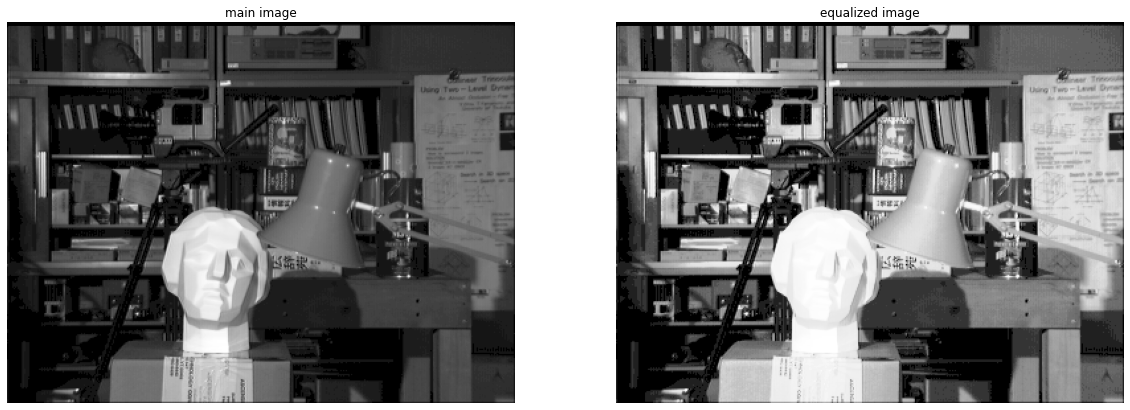

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b

<h3> in this section we want to implement the first method for ACE </h3>
<h3> you can use opencv library </h3>
<h3> use 48(6*8) grids (size of the grids should be 48*48) </h3> 

In [5]:
def ACE1(image, gridSize):
  '''
  you can use the equalize function of OpenCV for each grid
  Use first method for ACE implementation (calculating transition function for each grid)
  input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  # x,y = image.shape
  # output_image = image.copy()

  x, y = image.shape
  output_image = image.copy()

  for i in range(0, x, gridSize):
      for j in range(0, y, gridSize):
          grid = image[i:i+gridSize, j:j+gridSize]
          # equalize histogram of grid
          grid_eq = cv2.equalizeHist(grid)
          # replace grid in output image
          output_image[i:i+gridSize, j:j+gridSize] = grid_eq

  return output_image

(-0.5, 383.5, 287.5, -0.5)

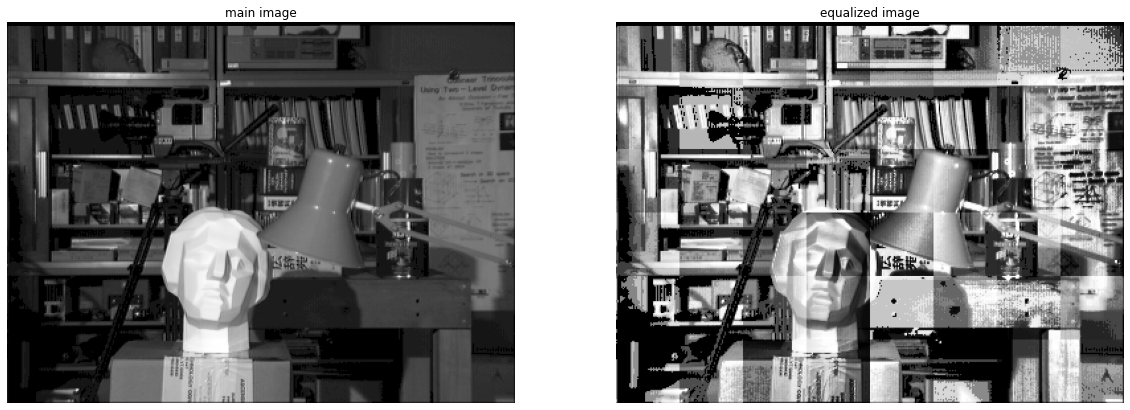

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part c

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you can use opencv library </h3>

In [11]:
def ACE2(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()

    w, h = gridSize

    pad_w = w // 2
    pad_h = h // 2

    padded_image = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REPLICATE)

    
    for i in range(pad_h, padded_image.shape[0]-pad_h):
        for j in range(pad_w, padded_image.shape[1]-pad_w):
            # Extract the grid centered at the current pixel
            grid = padded_image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]

            # Apply histogram equalization to the grid
            equalized_grid = cv2.equalizeHist(grid)

            # Update the current pixel in the output image with the equalized pixel value
            output[i-pad_h, j-pad_w] = equalized_grid[pad_h, pad_w]

    return output

(-0.5, 383.5, 287.5, -0.5)

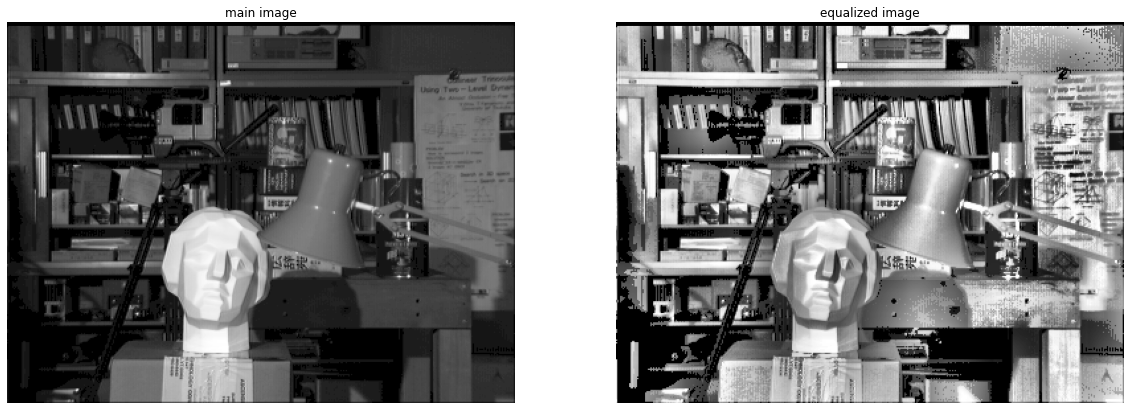

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part d

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [9]:

def CLAHE(image, gridSize, clip_limit):
    '''
    you can just use opencv library for calculate histogram and applying padding
    you can't use the equalize function of opencv
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
   
    output = image.copy()

   
    w, h = gridSize

    
    pad_w = w // 2
    pad_h = h // 2

    
    padded_image = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REFLECT)

    for i in range(pad_h, padded_image.shape[0]-pad_h):
        for j in range(pad_w, padded_image.shape[1]-pad_w):
            grid = padded_image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]

            hist, _ = np.histogram(grid.flatten(), bins=256, range=(0, 255))

            # har kodom ke bishtar az clip limit bashand ro tedadeshon ro clip limit mikone va onayee ke zir 0 and ro 0
            hist_clipped = np.clip(hist, 0, clip_limit).astype(np.float64)

            # tedade onayee ke clip shodan ro darmiyare
            num_clipped_pixels = np.sum(hist) - np.sum(hist_clipped)
            # on tedad ro beyn 256 ta bakhsh mikone
            hist_clipped +=  num_clipped_pixels/ 256
            # caculate cdf
            cdf = np.cumsum(hist_clipped)
            
            c,r=grid.shape
            cdf = 255 * (cdf - cdf[0]) / (c * r )

            # apply the equalization to grid
            equalized_grid = np.interp(grid, np.arange(256), cdf).astype(np.uint8)

            # update pixel in the output image with the equalized pixel value
            output[i-pad_h, j-pad_w] = equalized_grid[pad_h, pad_w]

    return output

(-0.5, 383.5, 287.5, -0.5)

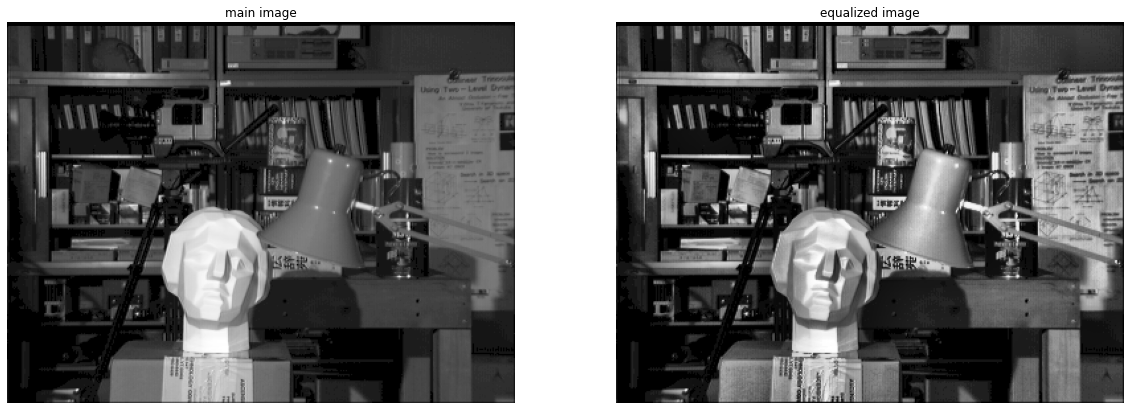

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image,(70,70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')